In [36]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("../../datasets/MLCourse/PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [24]:
df["Hired"] = df["Hired"].apply(lambda x: 1 if x == "Y" else 0)
df["Interned"] = df["Interned"].apply(lambda x: 1 if x == "Y" else 0)
df["Top-tier school"] = df["Top-tier school"].apply(lambda x: 1 if x == "Y" else 0)
df["Employed?"] = df["Employed?"].apply(lambda x: 1 if x == "Y" else 0)
df["Level of Education"] = df["Level of Education"].map({"BS": 0, "MS": 1, "PhD": 2})
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [30]:
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

clf = DecisionTreeClassifier()
clf.fit(X, y);

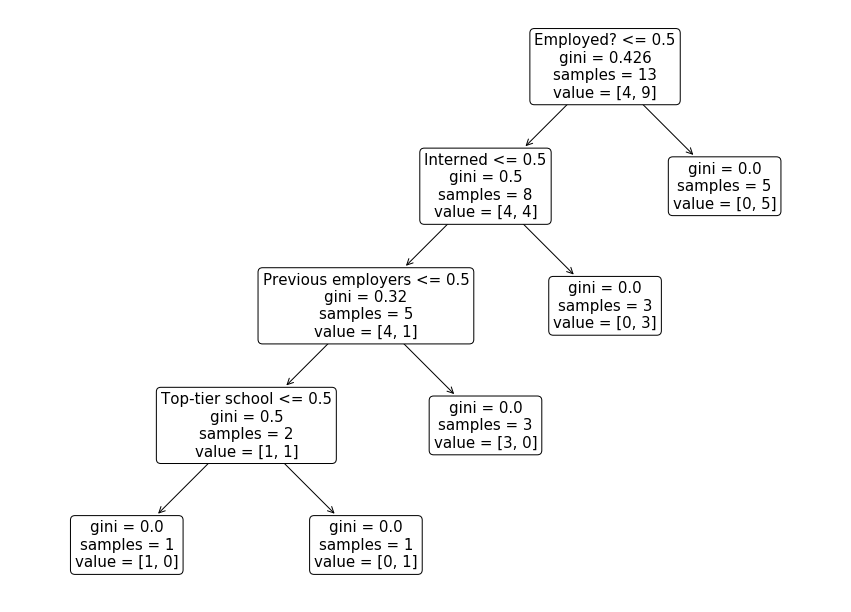

In [38]:
plt.figure(figsize=(15, 11))
plot_tree(clf, feature_names=df.columns, rounded=True, fontsize=15);

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [21]:
clf = XGBClassifier(learning_rate=0.01, n_estimators=200)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])